<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/Prepared_to_exam_00_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA WRANLING - RICARDO SERON GRACIA

#1.IMPORTING LIBRARIES AND MOUNTING DRIVE UNIT 
(ONLY NEED TO DO ONCE)

Also some warning deactivation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Mount GoogleDrive as unit

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 Removing warning by slicing utilization.
https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

#2. EXTRACTING DATA FROM CSV FILES

In this exercise to increase usage of different instruction 2 datasets have been chosen . Those DS will be link matching a commond field... but it will not be as easy as it looks.

In [4]:
data_drink=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/drinks.csv')
data_life=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/DW/lifeexpectancy.csv')

#3. ANALYZING BOTH DATA SETS

##  Let's take an OVERVIEW  to the tables

As noticeit  will be noticed below:
-  data_drink table will show alcohol consumption for different countries. 
-  data_life table will show data from WHO. (World Health Organization) for life expentancy  https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy

In [5]:
print(data_drink.shape)
print(data_life.shape)

(193, 5)
(6408, 16)


In [6]:
data_drink.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


✅ total_litres_of_pure_alcohol is a column that should be calculated from the servings (we will see later)

In [7]:
data_drink.info() ## Something to review later. Not all columns are numerical... and they should.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    object 
 2   spirit_servings               193 non-null    object 
 3   wine_servings                 193 non-null    object 
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


In [8]:
data_life.head(5)

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000


✅ CountryDisplay & country are columns to match  data with data_drink DS

✅ Most of the columns are repeated. Should be avoided (no extra info) 

In [9]:
data_life.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

---
*Not important. Just only practising as example of how to filter 

✅ Some specific review of each column 


In [10]:
temp=data_life.loc[data_life['WorldBankIncomeGroupGroupCode']=='WB_LMI'] #Not really neccesary . Only used as example of how to filter 
temp

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
36,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,74,74.0
37,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,FMLE,Female,75,75.0
38,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,MLE,Male,73,73.0
39,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,70,70.0
40,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,FMLE,Female,73,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6238,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2000,2000,WPR,Western Pacific,WB_LMI,Lower_middle_income,VUT,Vanuatu,FMLE,Female,18,18.0
6239,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2000,2000,WPR,Western Pacific,WB_LMI,Lower_middle_income,VUT,Vanuatu,MLE,Male,16,16.0
6240,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,WPR,Western Pacific,WB_LMI,Lower_middle_income,VUT,Vanuatu,BTSX,Both sexes,16,16.0
6241,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,WPR,Western Pacific,WB_LMI,Lower_middle_income,VUT,Vanuatu,FMLE,Female,17,17.0


---

☝ ToDo: I will combine (merge) both datasets by using Country Display vs country column

As noticed below :
data_drink['country'] --- Length: 193
data_life['CountryDisplay'] --- Length: 194

I should work with those columns to confirm they match perfectly. Data life contains 1 country more than data_drink


In [11]:
print(data_drink['country'].value_counts())   #193 countries 

Afghanistan      1
Lithuania        1
Nicaragua        1
Niger            1
Nigeria          1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: country, Length: 193, dtype: int64


In [12]:
#print(data_life['CountryDisplay'].nunique())   #194 countries
print(data_life['CountryDisplay'].value_counts())  # 33 data for every country except South Sudan #194 countries (mismatch with previous column... 

South Sudan    39
Afghanistan    33
Nicaragua      33
Nigeria        33
Niue           33
               ..
Greece         33
Grenada        33
Guatemala      33
Guinea         33
Zimbabwe       33
Name: CountryDisplay, Length: 194, dtype: int64


In [14]:
temp=data_life.loc[data_life['CountryDisplay']=='South Sudan']
temp #Sudan has 39 registers and this is more than the rest . This is because WorldBankIncomeGroupGroupCode that combines Low & Low middle income

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
5280,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,AFR,Africa,NaN,NaN,SSD,South Sudan,BTSX,Both sexes,56,56.41164
5281,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,AFR,Africa,NaN,NaN,SSD,South Sudan,FMLE,Female,57,57.48568
5282,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,AFR,Africa,NaN,NaN,SSD,South Sudan,MLE,Male,55,55.34608
5283,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,BTSX,Both sexes,55,55.00000
5284,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,FMLE,Female,56,56.00000
5285,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,MLE,Male,54,54.00000
5286,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,BTSX,Both sexes,49,49.00000
5287,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,FMLE,Female,50,50.00000
5288,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,MLE,Male,47,47.00000
5289,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,EMR,Eastern Mediterranean,WB_LI,Low_income,SSD,South Sudan,BTSX,Both sexes,42,42.00000


In [15]:
print(data_life['GhoCode'].value_counts())
print('------------------------\n')
print(data_life['GhoDisplay'].value_counts())  ## It is the same as before (text instead code)
print('------------------------\n')
print(data_life['PublishStateCode'].value_counts())  ## Not important. Always the same
print('------------------------\n')
print(data_life['YearCode'].value_counts())  
print('------------------------\n')
print(data_life['RegionDisplay'].value_counts())  
print('------------------------\n')
print(data_life['WorldBankIncomeGroupGroupCode'].value_counts())  ## Income for the people
print('------------------------\n')
print(data_life['SexCode'].value_counts())  ## BTSX is an average . These lines could be deleted if considering male/female independently

WHOSIS_000001    2328
WHOSIS_000015    2328
WHOSIS_000002    1752
Name: GhoCode, dtype: int64
------------------------

Life expectancy at birth (years)                   2328
Life expectancy at age 60 (years)                  2328
Healthy life expectancy (HALE) at birth (years)    1752
Name: GhoDisplay, dtype: int64
------------------------

PUBLISHED    6408
Name: PublishStateCode, dtype: int64
------------------------

2012    1749
2000    1749
2013    1746
1990    1164
Name: YearCode, dtype: int64
------------------------

Europe                   1749
Africa                   1524
Americas                 1155
Western Pacific           891
Eastern Mediterranean     726
South_East Asia           363
Name: RegionDisplay, dtype: int64
------------------------

WB_LMI    1440
WB_HI     1377
WB_UMI    1215
WB_LI     1212
Name: WorldBankIncomeGroupGroupCode, dtype: int64
------------------------

BTSX    2136
FMLE    2136
MLE     2136
Name: SexCode, dtype: int64


---

#4. DATA_LIFE - CLEANSING 

As seen we should rename some countries in the original datasets.

In [17]:
# These lines should be executed just only during the rename process.

# they will be used for a wrapping text issue (with UK) 
print('------ AVOID WRAPPING in UK ----------')
UKtemp=data_life[data_life['CountryDisplay'].str.contains("United Kingdom of")]
print(UKtemp.iloc[1]['CountryDisplay'])
#UK_modify=UKtemp['CountryDisplay']

print('\n\n------- DATA LIFE ----------')
# Sudan exists with 2 names in data_life but only one reference in data_drink
temp1=data_life[data_life['CountryDisplay'].str.contains("Sudan")]
temp1=temp1['CountryDisplay'].drop_duplicates()
print(temp1)

print('\n\n------- DATA DRINK ----------')
temp1=data_drink[data_drink['country'].str.contains("Sudan")]
temp1=temp1['country'].drop_duplicates()
print(temp1)


------ AVOID WRAPPING in UK ----------
United Kingdom of Great Britain and Northern Ireland


------- DATA LIFE ----------
5280    South Sudan
5385          Sudan
Name: CountryDisplay, dtype: object


------- DATA DRINK ----------
163    Sudan
Name: country, dtype: object


There are some small differences between 2 DS for some countries. I will look for the not matched countries to highlight those countries that should be pre-processed.

❗ Once this rename is taking place we could re-execute these two lines and differences will be reduce to 0


  Watch out: UK name is larger than shown in display

In [18]:
temp=data_life.loc[~data_life.CountryDisplay.isin(data_drink.country)] #♥Rows in data_life that are not in data_drink
temp=temp['CountryDisplay'].drop_duplicates()
#temp=temp.drop_duplicates(subset='CountryCode', keep="first")
print ('Hay ',temp.size,' diferencias')
print(temp)


Hay  27  diferencias
165                                   Antigua and Barbuda
660                      Bolivia (Plurinational State of)
693                                Bosnia and Herzegovina
792                                     Brunei Darussalam
1353                                        Côte d'Ivoire
1518                Democratic People's Republic of Korea
1551                     Democratic Republic of the Congo
2343                                        Guinea_Bissau
2607                           Iran (Islamic Republic of)
3036                     Lao People's Democratic Republic
3630                     Micronesia (Federated States of)
4554                                    Republic of Korea
4587                                  Republic of Moldova
4719                                Saint Kitts and Nevis
4752                                          Saint Lucia
4785                     Saint Vincent and the Grenadines
4884                                Sao Tome and Pr

In [19]:
temp=data_drink.loc[~data_drink.country.isin(data_life.CountryDisplay)]
temp=temp['country'].drop_duplicates()
print ('Hay ',temp.size,' diferencias')
print(temp)


Hay  26  diferencias
5                 Antigua & Barbuda
20                          Bolivia
21               Bosnia-Herzegovina
24                           Brunei
41                    Cote d'Ivoire
50                         DR Congo
70                    Guinea-Bissau
78                             Iran
91                             Laos
99                        Macedonia
110                      Micronesia
111                         Moldova
127                     North Korea
145             Sao Tome & Principe
157                     South Korea
160               St. Kitts & Nevis
161                       St. Lucia
162    St. Vincent & the Grenadines
168                           Syria
170                        Tanzania
172                     Timor-Leste
175               Trinidad & Tobago
183                  United Kingdom
185                             USA
188                       Venezuela
189                         Vietnam
Name: country, dtype: object


In [20]:
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Antigua and Barbuda'], 'Antigua & Barbuda')
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Bolivia (Plurinational State of)'], 'Bolivia')
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Bosnia and Herzegovina', 'Brunei Darussalam',"Côte d'Ivoire" ], ['Bosnia-Herzegovina', 'Brunei', "Cote d'Ivoire"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(["Democratic People's Republic of Korea", 'Democratic Republic of the Congo',"Guinea_Bissau" ], ['North Korea', 'DR Congo', "Guinea-Bissau"])  # NorthKorea is RD Korea
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Iran (Islamic Republic of)', "Lao People's Democratic Republic","Micronesia (Federated States of)" ], ['Iran', 'Laos', "Micronesia"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Republic of Korea', 'Republic of Moldova',"Saint Kitts and Nevis" ], ['South Korea', 'Moldova', "St. Kitts & Nevis"])  #https://en.wikipedia.org/wiki/South_Korea
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Saint Lucia', 'Saint Vincent and the Grenadines',"Sao Tome and Principe" ], ['St. Lucia', 'St. Vincent & the Grenadines', "Sao Tome & Principe"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Syrian Arab Republic', 'The former Yugoslav republic of Macedonia',"Timor_Leste" ], ['Syria', 'Macedonia', "Timor-Leste"])
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['Trinidad and Tobago', "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania" ], ['Trinidad & Tobago', 'United Kingdom', "Tanzania"]) #It doesn't work. ... is wrapped text.
data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['United States of America', 'Venezuela (Bolivarian Republic of)',"Viet Nam" ], ['USA', 'Venezuela', "Vietnam"])
#data_life['CountryDisplay'] = data_life['CountryDisplay'].replace(['South Sudan'], 'Sudan') ... South Sudan is not Sudan ... que quedará fuera...

Repeat the same ... Reduce unmatched values to 0

In [23]:
temp=data_life.loc[~data_life.CountryDisplay.isin(data_drink.country)] #♥Rows in data_life that are not in data_drink
temp=temp['CountryDisplay'].drop_duplicates()
#temp=temp.drop_duplicates(subset='CountryCode', keep="first")
print ('Hay ',temp.size,' diferencias')
print(temp)

Hay  1  diferencias
5280    South Sudan
Name: CountryDisplay, dtype: object


In [22]:
temp=data_drink.loc[~data_drink.country.isin(data_life.CountryDisplay)]
temp=temp['country'].drop_duplicates()
print ('Hay ',temp.size,' diferencias')
print(temp)


Hay  0  diferencias
Series([], Name: country, dtype: object)


Blanks detected will be used later. No issues
In this dataset no further action will be taken

In [24]:
#NULLS?
print(pd.isnull(data_life).sum())

GhoCode                             0
GhoDisplay                          0
PublishStateCode                    0
PublishStateDisplay                 0
YearCode                            0
YearDisplay                         0
RegionCode                          0
RegionDisplay                       0
WorldBankIncomeGroupGroupCode    1164
WorldBankIncomeGroupDisplay      1164
CountryCode                         0
CountryDisplay                      0
SexCode                             0
SexDisplay                          0
DisplayValue                        0
Numeric                             0
dtype: int64


In [25]:
#NAN?
print(pd.isna(data_life).sum())

GhoCode                             0
GhoDisplay                          0
PublishStateCode                    0
PublishStateDisplay                 0
YearCode                            0
YearDisplay                         0
RegionCode                          0
RegionDisplay                       0
WorldBankIncomeGroupGroupCode    1164
WorldBankIncomeGroupDisplay      1164
CountryCode                         0
CountryDisplay                      0
SexCode                             0
SexDisplay                          0
DisplayValue                        0
Numeric                             0
dtype: int64


In [26]:
data_life.rename(columns = {'CountryDisplay':'country'}, inplace = True) #Same column name (only to better understanding)

---

#5.  DATA_DRINK - CLEANSING  

(Warning- It contains an error to be documented)

✅ Blanks will be calculated (total_liters...)

In [27]:
#NULLS?
print(pd.isnull(data_drink).sum())

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64


In [28]:
#NAN?
print(pd.isna(data_drink).sum())

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64


## ❗ FAILURE !!! .... Character '?' has been used instead of blanks, nulls ...

ValueError: could not convert string to float: '?'

In [29]:
# Error when trying to cast from string to float. Message notices '?' character
#     ValueError: could not convert string to float: '?'
#data_drink.beer_servings = data_drink.beer_servings.astype(float) 

SIDE NOTE (to remember):

>> **loc** is based on columns name

> >**iloc** similar but based on column ID (from 0)





pandas.Series.str.contains

 Test if pattern or regex (Regular expresion) is contained within a string of a Series or Index.

  regexbool, default True

  > If True, assumes the pat is a regular expression.

  > If False, treats the pat as a literal string.

 
 These are examples that clarify this REGular EXpresion concept

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=False)] 

data_drink.loc[data_drink['beer_servings'].str.contains('11?49', regex=True)]

## ✅ After error ... let's fix it

In [30]:
data_drink.loc[data_drink['beer_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,?,27,86,NaN


In [31]:
data_drink.loc[data_drink['spirit_servings'].str.contains('?', regex=False)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
46,Denmark,224,?,278,NaN


In [32]:
data_drink.loc[data_drink['wine_servings'].str.contains('?', regex=False)] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
11,Bahamas,122,176,?,NaN


## ✅ Trying to replace or delete '?' . 

What is the best approach ?

 >> #1. Using mean/median for the column. (I guess not so goood...)

 >> #2. We could drop as they are 3 among aprox 200.... and forget about them. In this example we could lost more data in future steps.

 >> #3. Ratio Average of consum for the rest of the countries


 I will try to calculate  #3 as it could be a good approach that could avoid data losses and simple column average could penalize last column calculation for these 3 countries that is pretended to be used later in the process instead of separated drinks.

 Also it will combine lot of slicing, filters, ...etc. So it is also great to practice

 

In [33]:
data_drink_drop=data_drink
data_drink_drop = data_drink[ (data_drink['beer_servings'] != '?') & (data_drink['spirit_servings'] != '?') & (data_drink['wine_servings'] != '?')]
data_drink_drop.shape # Original was (193,5). Three rows will be drop (Macedonia, Denmark and Bahamas)

(190, 5)

In [34]:
# Now 3 rows with issue are dropped I could cast columns as float. 
data_drink_drop.beer_servings = data_drink_drop.beer_servings.astype(float) 
data_drink_drop.spirit_servings = data_drink_drop.spirit_servings.astype(float) 
data_drink_drop.wine_servings = data_drink_drop.wine_servings.astype(float) 

In [35]:
# That's better... Float64 for our columns
data_drink_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       190 non-null    object 
 1   beer_servings                 190 non-null    float64
 2   spirit_servings               190 non-null    float64
 3   wine_servings                 190 non-null    float64
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 8.9+ KB


## ✅ Calculate total litres as per formula & study dataset

As indication of the dataframe webportal. Total_litres column should be calculated based on an alcohol graduation stimation

REFERENCE (and stimation) :

https://www.binghamton.edu/hpps/atod/standarddrink.html#:~:text=12%20ounces%20of%20regular%20beer,proof%20liquor%3A%20about%2050%25%20ABV

12 ounces of regular beer: about 5% alcohol by volume (ABV)

5 ounces of wine: about 12% ABV

1.5 ounces of 80-proof liquor (vodka, rum, tequila, etc): about 40% ABV

1 ounce of 100-proof liquor: about 50% ABV

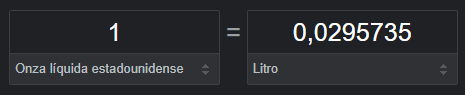




In [36]:
data_drink_drop.total_litres_of_pure_alcohol = (12*0.0295*0.05*data_drink_drop.beer_servings)+(1.5*0.0295*0.4*data_drink_drop.spirit_servings)+(5*0.0295*0.12*data_drink_drop.wine_servings)

(0.0, 14.0)

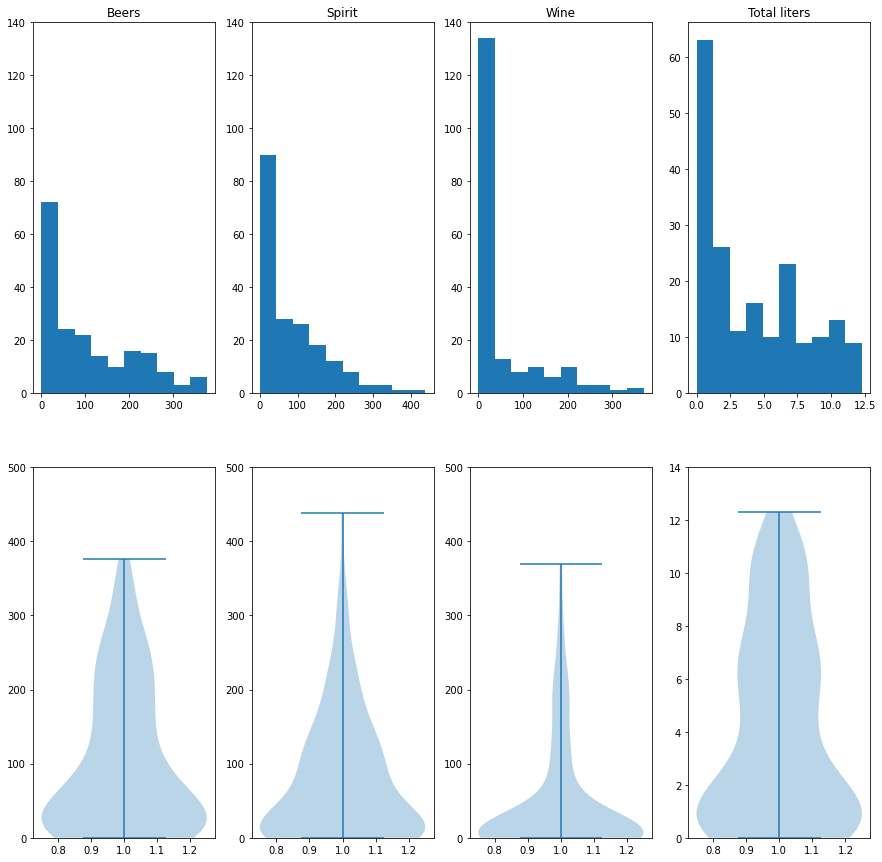

In [37]:
fig,ax = plt.subplots(2,4,figsize=(15, 15))

ax[0,0].hist(data_drink_drop['beer_servings'])
ax[0,0].set_title('Beers')
ax[0,0].set_ylim(0,140)
ax[0,1].hist(data_drink_drop['spirit_servings'])
ax[0,1].set_title('Spirit')
ax[0,1].set_ylim(0,140)
ax[0,2].hist(data_drink_drop['wine_servings'])
ax[0,2].set_title('Wine')
ax[0,2].set_ylim(0,140)
ax[0,3].hist(data_drink_drop['total_litres_of_pure_alcohol'])
ax[0,3].set_title('Total liters')

ax[1,0].violinplot(data_drink_drop['beer_servings'])
ax[1,0].set_ylim(0,500)
ax[1,1].violinplot(data_drink_drop['spirit_servings'])
ax[1,1].set_ylim(0,500)
ax[1,2].violinplot(data_drink_drop['wine_servings'])
ax[1,2].set_ylim(0,500)
ax[1,3].violinplot(data_drink_drop['total_litres_of_pure_alcohol'])
ax[1,3].set_ylim(0,14)


Text(0.5, 1.0, 'Total(ltr)')

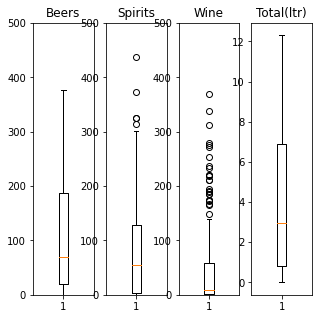

In [38]:
#The same as previous but to practice boxplot
fig,ax = plt.subplots(1,4,figsize=(5,5))

ax[0].boxplot(data_drink_drop['beer_servings'])
ax[0].set_ylim(0,500)
ax[0].set_title('Beers')

ax[1].boxplot(data_drink_drop['spirit_servings'])
ax[1].set_ylim(0,500)
ax[1].set_title('Spirits')

ax[2].boxplot(data_drink_drop['wine_servings'])
ax[2].set_ylim(0,500)
ax[2].set_title('Wine')

ax[3].boxplot(data_drink_drop['total_litres_of_pure_alcohol'])
ax[3].set_title('Total(ltr)')

In [39]:
 mean_beer=np.mean(data_drink_drop.beer_servings)
 mean_wine=np.mean(data_drink_drop.wine_servings)
 mean_spirit=np.mean(data_drink_drop.spirit_servings)
 print('Median beer: ', mean_beer)
 print('Median spirits: ',mean_spirit)
 print('Median wine: ',mean_wine)
 

Median beer:  105.4578947368421
Median spirits:  80.77894736842106
Median wine:  48.04736842105263


In [40]:
print('Avg beer: ', np.median(data_drink_drop.beer_servings))
print('Avg spirits: ',np.median(data_drink_drop.spirit_servings))
print('Avg Wine: ',np.median(data_drink_drop.wine_servings))


Avg beer:  70.0
Avg spirits:  55.5
Avg Wine:  8.0


In [41]:
data_drink_drop.head(5)
#df.total_litres_of_pure_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0000
1,Albania,89.0,132.0,54.0,4.8675
2,Algeria,25.0,0.0,14.0,0.6903
3,Andorra,245.0,138.0,312.0,12.3015
4,Angola,217.0,57.0,45.0,5.6463


In [42]:
data_drink_drop[(data_drink_drop['total_litres_of_pure_alcohol'] > 0.1) & (data_drink_drop['total_litres_of_pure_alcohol'] < 0.5) ]  

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
19,Bhutan,23.0,0.0,0.0,0.4071
32,Central African Republic,17.0,2.0,1.0,0.3540
33,Chad,15.0,1.0,1.0,0.3009
52,Egypt,6.0,4.0,1.0,0.1947
55,Eritrea,18.0,0.0,0.0,0.3186
57,Ethiopia,20.0,3.0,0.0,0.4071
62,Gambia,8.0,0.0,1.0,0.1593
69,Guinea,9.0,0.0,2.0,0.1947
77,Indonesia,5.0,1.0,0.0,0.1062
79,Iraq,9.0,3.0,0.0,0.2124


Look for data consider as "suspicious"

In [43]:
data_drink_drop[((data_drink_drop['beer_servings']<0.001)| (data_drink_drop['spirit_servings']<0.001) | (data_drink_drop['wine_servings']<0.001))&(data_drink_drop['total_litres_of_pure_alcohol']>1.0)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
27,Burundi,88.0,0.0,0.0,1.5576
39,Cook Islands,0.0,254.0,74.0,5.8056
54,Equatorial Guinea,92.0,0.0,233.0,5.7525
76,India,9.0,114.0,0.0,2.1771
91,Laos,62.0,0.0,123.0,3.2745
94,Lesotho,82.0,29.0,0.0,1.9647
119,Nauru,49.0,0.0,8.0,1.0089
159,Sri Lanka,16.0,104.0,0.0,2.1240


In [44]:
print(data_drink_drop.isna().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64


❗
**Finally there is no a really clear correlation using different drinks so the final decision will be to drop the countries without data (?)**

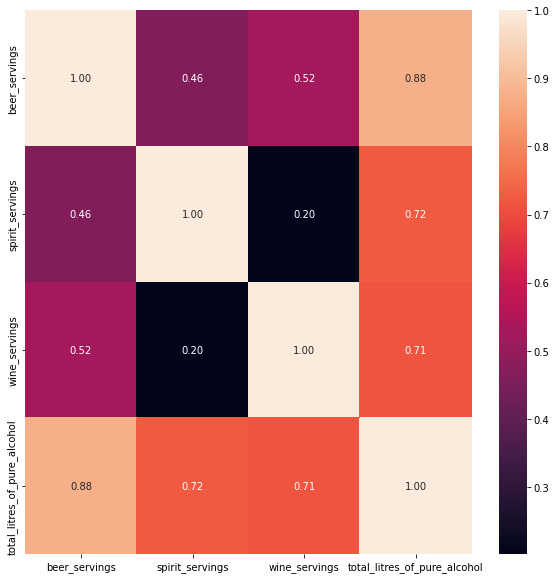

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(data_drink_drop.corr(), annot=True, fmt='.2f')

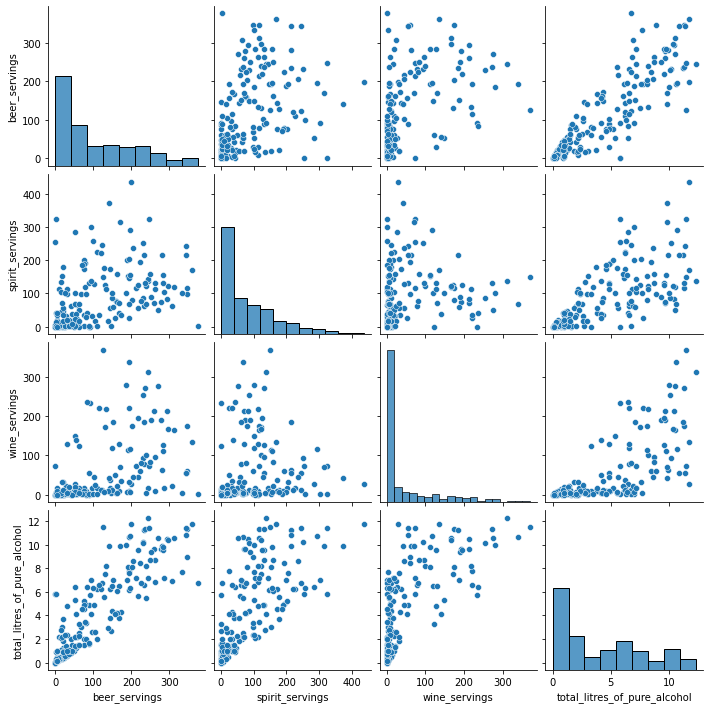

In [46]:
sns.pairplot(data_drink_drop)

#6. DATA TO FILTER AND MERGE

## Should use data_life filtered by different KPI (WHO001 , 2 & 15)

I am only interested in WHOSIS_0001... for both genders. This metric is lifeexpectation (total - from birth)

In [47]:
life_df = data_life[['GhoCode', 'RegionCode','YearCode','WorldBankIncomeGroupGroupCode','country','SexCode','Numeric']]
life_df.head(5)

,GhoCode,RegionCode,YearCode,WorldBankIncomeGroupGroupCode,country,SexCode,Numeric
0,WHOSIS_000001,EMR,2013,NaN,Afghanistan,BTSX,61.25205
1,WHOSIS_000001,EMR,2013,NaN,Afghanistan,FMLE,61.97733
2,WHOSIS_000001,EMR,2013,NaN,Afghanistan,MLE,60.51228
3,WHOSIS_000001,EMR,2012,WB_LI,Afghanistan,BTSX,60.00000
4,WHOSIS_000001,EMR,2012,WB_LI,Afghanistan,FMLE,61.00000


In [48]:
#I will use Life expectancy at birth (years) = WHOSIS_000001
#life_df=life_df.loc[ (life_df['GhoCode']=='WHOSIS_000001') & (life_df.isna().any(axis=1))]
life_df=life_df.loc[ (life_df['GhoCode']=='WHOSIS_000001') ]

In [49]:
life_df.shape # 194countries x 3 categories (Male,Female, Both) = 582

(2328, 7)

In [50]:
print(life_df['country'].value_counts())

Afghanistan                     12
St. Vincent & the Grenadines    12
Niger                           12
Nigeria                         12
Niue                            12
                                ..
Greece                          12
Grenada                         12
Guatemala                       12
Guinea                          12
Zimbabwe                        12
Name: country, Length: 194, dtype: int64


---
TABLES TO BE MERGED BY USING COUNTRY

In [51]:
#life_df.to_csv('df2.csv')
print(life_df.shape)
life_df.head(5)

(2328, 7)


,GhoCode,RegionCode,YearCode,WorldBankIncomeGroupGroupCode,country,SexCode,Numeric
0,WHOSIS_000001,EMR,2013,NaN,Afghanistan,BTSX,61.25205
1,WHOSIS_000001,EMR,2013,NaN,Afghanistan,FMLE,61.97733
2,WHOSIS_000001,EMR,2013,NaN,Afghanistan,MLE,60.51228
3,WHOSIS_000001,EMR,2012,WB_LI,Afghanistan,BTSX,60.00000
4,WHOSIS_000001,EMR,2012,WB_LI,Afghanistan,FMLE,61.00000


In [52]:
#data_drink_drop.to_csv('data_drink.csv')
print(data_drink_drop.shape)
data_drink_drop.head(5)

(190, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0000
1,Albania,89.0,132.0,54.0,4.8675
2,Algeria,25.0,0.0,14.0,0.6903
3,Andorra,245.0,138.0,312.0,12.3015
4,Angola,217.0,57.0,45.0,5.6463


---

In [65]:
df_merge=pd.merge(data_drink_drop,life_df,how='right',on='country')
print(df_merge.shape)
df_merge.head(5)

(2328, 11)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,YearCode,WorldBankIncomeGroupGroupCode,SexCode,Numeric
0,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,EMR,2013,NaN,BTSX,61.25205
1,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,EMR,2013,NaN,FMLE,61.97733
2,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,EMR,2013,NaN,MLE,60.51228
3,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,EMR,2012,WB_LI,BTSX,60.00000
4,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,EMR,2012,WB_LI,FMLE,61.00000


---

Data from 2013 shows NaN in Income Group. So I will refill with data from previous published year

In [54]:
life_df_bank=data_life.loc[(data_life['GhoCode']=='WHOSIS_000001')]
life_df_bank=life_df_bank[['country','WorldBankIncomeGroupGroupCode']]
life_df_bank=life_df_bank.dropna()
life_df_bank=life_df_bank.drop_duplicates()
life_df_bank.rename(columns = {'CountryDisplay':'country'}, inplace = True) #Rename of the column tag (could be done before....)
life_df_bank
#life_df_bank.to_csv('life_df_bank.csv')

In [55]:
life_df_bank['country'].value_counts()

Afghanistan                     1
St. Vincent & the Grenadines    1
Niger                           1
Nigeria                         1
Niue                            1
                               ..
Greece                          1
Grenada                         1
Guatemala                       1
Guinea                          1
Zimbabwe                        1
Name: country, Length: 194, dtype: int64

In [56]:
#If I chose complete dataset South Sudan has 2 different income categories
#life_df_bank.drop(    life_df_bank[(life_df_bank['country'] == 'South Sudan')&(life_df_bank['WorldBankIncomeGroupGroupCode'] >= 'WB_LI')].index,       inplace = True    )

In [58]:
df_merge.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,YearCode,WorldBankIncomeGroupGroupCode,SexCode,Numeric
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,NaN,BTSX,61.25205
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,NaN,FMLE,61.97733
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,NaN,MLE,60.51228
3,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2012,WB_LI,BTSX,60.00000
4,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2012,WB_LI,FMLE,61.00000
5,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2012,WB_LI,MLE,58.00000
6,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2000,WB_LI,BTSX,55.00000
7,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2000,WB_LI,FMLE,56.00000
8,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2000,WB_LI,MLE,54.00000
9,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,1990,WB_LI,BTSX,49.00000


In [59]:
df_merge.shape

(2328, 11)

In [60]:
df_merge=pd.merge(df_merge,life_df_bank,how='outer',on='country') # Merging data with bank income
df_merge=df_merge.drop('WorldBankIncomeGroupGroupCode_x',axis=1) # drop non valid column
df_merge.rename(columns = {'WorldBankIncomeGroupGroupCode_y':'BankIncomeGroup'}, inplace = True) #Rename of the column tag
df_merge

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,YearCode,SexCode,Numeric,BankIncomeGroup
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,BTSX,61.25205,WB_LI
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,FMLE,61.97733,WB_LI
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2013,MLE,60.51228,WB_LI
3,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2012,BTSX,60.00000,WB_LI
4,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,2012,FMLE,61.00000,WB_LI
...,...,...,...,...,...,...,...,...,...,...,...
2323,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,2000,FMLE,42.00000,WB_LI
2324,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,2000,MLE,42.00000,WB_LI
2325,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,1990,BTSX,62.00000,WB_LI
2326,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,1990,FMLE,64.00000,WB_LI


In [61]:
df_merge['YearCode']=df_merge['YearCode']-min(df_merge['YearCode']) #Year Code will be reduce to a lower scale (sub 1990 (mínimum)). 
df_merge

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,RegionCode,YearCode,SexCode,Numeric,BankIncomeGroup
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,23,BTSX,61.25205,WB_LI
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,23,FMLE,61.97733,WB_LI
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,23,MLE,60.51228,WB_LI
3,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,22,BTSX,60.00000,WB_LI
4,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,EMR,22,FMLE,61.00000,WB_LI
...,...,...,...,...,...,...,...,...,...,...,...
2323,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,10,FMLE,42.00000,WB_LI
2324,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,10,MLE,42.00000,WB_LI
2325,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,0,BTSX,62.00000,WB_LI
2326,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,AFR,0,FMLE,64.00000,WB_LI


---

In [62]:
df_merge_oh = pd.get_dummies(df_merge,columns=['RegionCode','SexCode'],drop_first=False) #drop_first to drop one of the columns. By now I will keep those columns. If required (example ... Regression) will be drop later.
df_merge_oh.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearCode,Numeric,BankIncomeGroup,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE
0,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,23,61.25205,WB_LI,0,0,1,0,0,0,1,0,0
1,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,23,61.97733,WB_LI,0,0,1,0,0,0,0,1,0
2,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,23,60.51228,WB_LI,0,0,1,0,0,0,0,0,1
3,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,22,60.00000,WB_LI,0,0,1,0,0,0,1,0,0
4,Afghanistan,0.0,0.0,0.0,0.0,WHOSIS_000001,22,61.00000,WB_LI,0,0,1,0,0,0,0,1,0



WB_HI     1377 (HIGH)

WB_UMI    1215 (UPPER MIDDLE)

WB_LMI    1440  (LOW MIDDLE)

WB_LI     1212 (LOW)

Name: WorldBankIncomeGroupGroupCode, dtype: int64\

In [63]:
dictionary={'WB_LI':1,
                 'WB_LMI':2,
                 'WB_UMI':3,
                 'WB_HI':4}
df_merge_oh['numericIncomeGroup']=df_merge_oh.BankIncomeGroup.map(dictionary)

In [64]:
df_merge_oh

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearCode,Numeric,BankIncomeGroup,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE,numericIncomeGroup
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,61.25205,WB_LI,0,0,1,0,0,0,1,0,0,1
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,61.97733,WB_LI,0,0,1,0,0,0,0,1,0,1
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,60.51228,WB_LI,0,0,1,0,0,0,0,0,1,1
3,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,22,60.00000,WB_LI,0,0,1,0,0,0,1,0,0,1
4,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,22,61.00000,WB_LI,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,10,42.00000,WB_LI,1,0,0,0,0,0,0,1,0,1
2324,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,10,42.00000,WB_LI,1,0,0,0,0,0,0,0,1,1
2325,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,0,62.00000,WB_LI,1,0,0,0,0,0,1,0,0,1
2326,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,0,64.00000,WB_LI,1,0,0,0,0,0,0,1,0,1


#7. DATA PLOTTING

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f860938b0>,
      dtype=object)

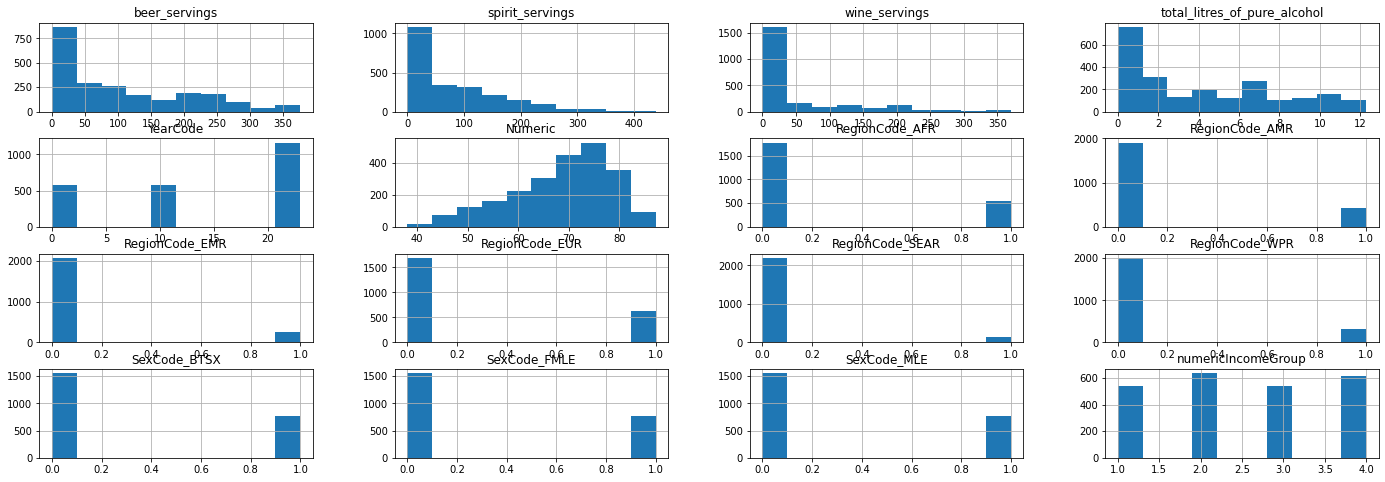

In [66]:
df_merge_oh.hist(figsize=(24,8))

Is the economics a factor to increase Life expentancy (numeric) ?

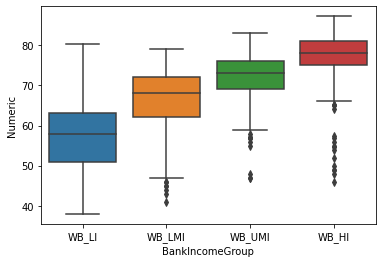

In [68]:
sns.boxplot(data=df_merge_oh, x='BankIncomeGroup', y='Numeric')

Countries with higher income drink more... not so clear with HI ... somthing to dive in...

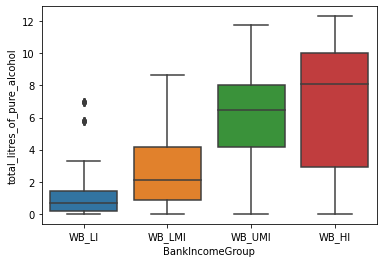

In [69]:
sns.boxplot(data=df_merge_oh, x='BankIncomeGroup', y='total_litres_of_pure_alcohol')

Maybe life exp. has increased along the times... 

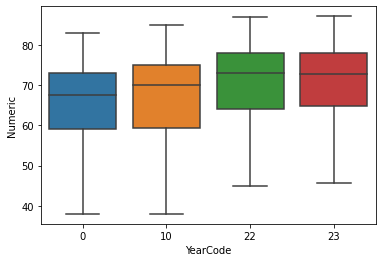

In [70]:
sns.boxplot(data=df_merge_oh, x='YearCode', y='Numeric')

Similar to previous but segregated by income

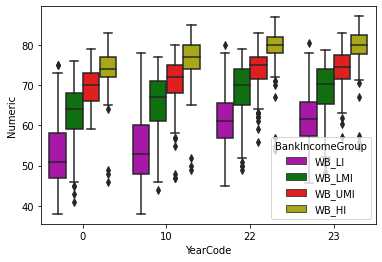

In [90]:
sns.boxplot(data=df_merge_oh, x='YearCode', y='Numeric' , hue=df_merge_oh.BankIncomeGroup,palette=['m','g','r','y'])

Is Region a factor to increase Life expentancy (numeric) ?

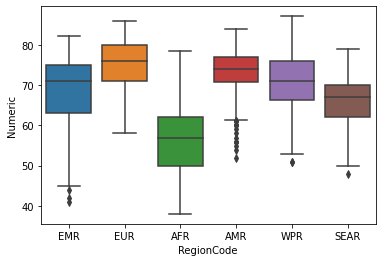

In [67]:
#Using the original that already has Region code without encoding
#SEAR - South East Asia
#WPR-  Western Pacific
#EMR  - Eastern Mediterranean

sns.boxplot(data=df_merge, x='RegionCode', y='Numeric')

In [ ]:
df_merge_oh=df_merge_oh.dropna()
df_merge_oh[((df_merge_oh['RegionCode_AMR']==1) &(df_merge_oh['Numeric']<65) )]

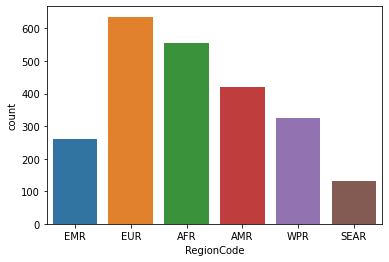

In [73]:
#SEAR - South East Asia
#WPR-  Western Pacific
#EMR  - Eastern Mediterranean

sns.countplot(data=df_merge, x=df_merge['RegionCode'])

In [74]:
df_merge_oh.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,YearCode,Numeric,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE,numericIncomeGroup
beer_servings,1.000000e+00,4.614330e-01,5.231963e-01,8.770946e-01,3.726476e-17,0.407446,-2.043737e-01,2.356269e-01,-3.306685e-01,4.189750e-01,-2.217978e-01,-9.439114e-02,5.377220e-17,-1.424245e-17,-1.383459e-17,5.441639e-01
spirit_servings,4.614330e-01,1.000000e+00,2.013981e-01,7.230223e-01,3.709357e-17,0.352105,-4.058647e-01,3.520794e-01,-2.376360e-01,3.606766e-01,-1.028911e-01,-6.412573e-02,3.859180e-17,1.525722e-17,-1.966985e-17,3.428541e-01
wine_servings,5.231963e-01,2.013981e-01,1.000000e+00,7.144752e-01,-4.246876e-18,0.415418,-2.168252e-01,-6.514662e-02,-1.943826e-01,5.660083e-01,-1.506319e-01,-1.055192e-01,6.414767e-17,2.110121e-19,-2.190305e-17,5.567731e-01
total_litres_of_pure_alcohol,8.770946e-01,7.230223e-01,7.144752e-01,1.000000e+00,2.867225e-17,0.502754,-3.524366e-01,2.390179e-01,-3.340695e-01,5.684884e-01,-2.077482e-01,-1.125657e-01,6.450340e-17,-5.871570e-19,-1.934822e-17,6.182360e-01
YearCode,3.726476e-17,3.709357e-17,-4.246876e-18,2.867225e-17,1.000000e+00,0.254334,2.962171e-03,8.562331e-17,-4.000557e-03,1.677225e-17,-8.712203e-18,-1.000248e-16,2.913737e-18,5.141890e-19,-7.027249e-18,2.192108e-17
Numeric,4.074464e-01,3.521053e-01,4.154182e-01,5.027541e-01,2.543343e-01,1.000000,-6.775016e-01,2.156801e-01,-8.423157e-03,4.136429e-01,-5.121849e-02,1.038209e-01,-1.670511e-03,1.693458e-01,-1.676753e-01,7.157537e-01
RegionCode_AFR,-2.043737e-01,-4.058647e-01,-2.168252e-01,-3.524366e-01,2.962171e-03,-0.677502,1.000000e+00,-2.624990e-01,-1.988118e-01,-3.430208e-01,-1.371712e-01,-2.249654e-01,2.469158e-17,2.207997e-17,1.234579e-17,-4.843436e-01
RegionCode_AMR,2.356269e-01,3.520794e-01,-6.514662e-02,2.390179e-01,8.562331e-17,0.215680,-2.624990e-01,1.000000e+00,-1.667191e-01,-2.876496e-01,-1.150287e-01,-1.886510e-01,7.180685e-17,1.284203e-17,1.351620e-17,1.396715e-01
RegionCode_EMR,-3.306685e-01,-2.376360e-01,-1.943826e-01,-3.340695e-01,-4.000557e-03,-0.008423,-1.988118e-01,-1.667191e-01,1.000000e+00,-2.178604e-01,-8.712059e-02,-1.428807e-01,-6.519137e-17,-1.821671e-17,-2.124281e-18,-1.740109e-02
RegionCode_EUR,4.189750e-01,3.606766e-01,5.660083e-01,5.684884e-01,1.677225e-17,0.413643,-3.430208e-01,-2.876496e-01,-2.178604e-01,1.000000e+00,-1.503139e-01,-2.465199e-01,9.506980e-18,-1.294084e-17,-2.293027e-17,4.378699e-01


Text(0.5, 1.0, 'Correlation Graphic')

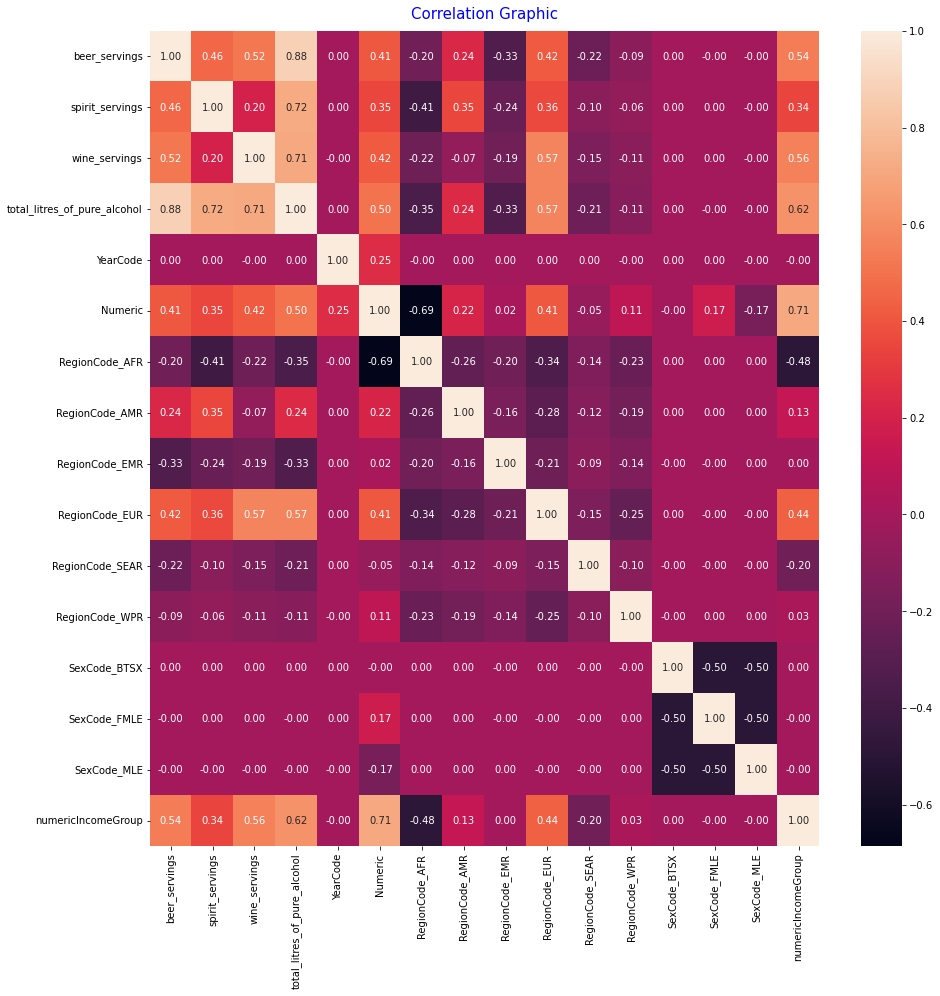

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(df_merge_oh.corr(), annot=True, fmt='.2f')
plt.title("Correlation Graphic", fontsize = 15, color = 'b', pad = 12, loc = 'center')

Funny conclusion from the heatmap:
- Living in Europe means higher alcohol consumption
- The more you drink the more you live... (tricky conclusion... probably due to correlation... be aware)

Also noticed that:
- Higher Income means more Life Expentancy. (+0.7)
- Living in Africa reduce your life expentancy (-0.69)
- Countries with higher income drinks more beer and wine

I will filter to a better visualization . By changing limit param filter will be modified

Text(0.5, 1.0, 'Correlation Graphic')

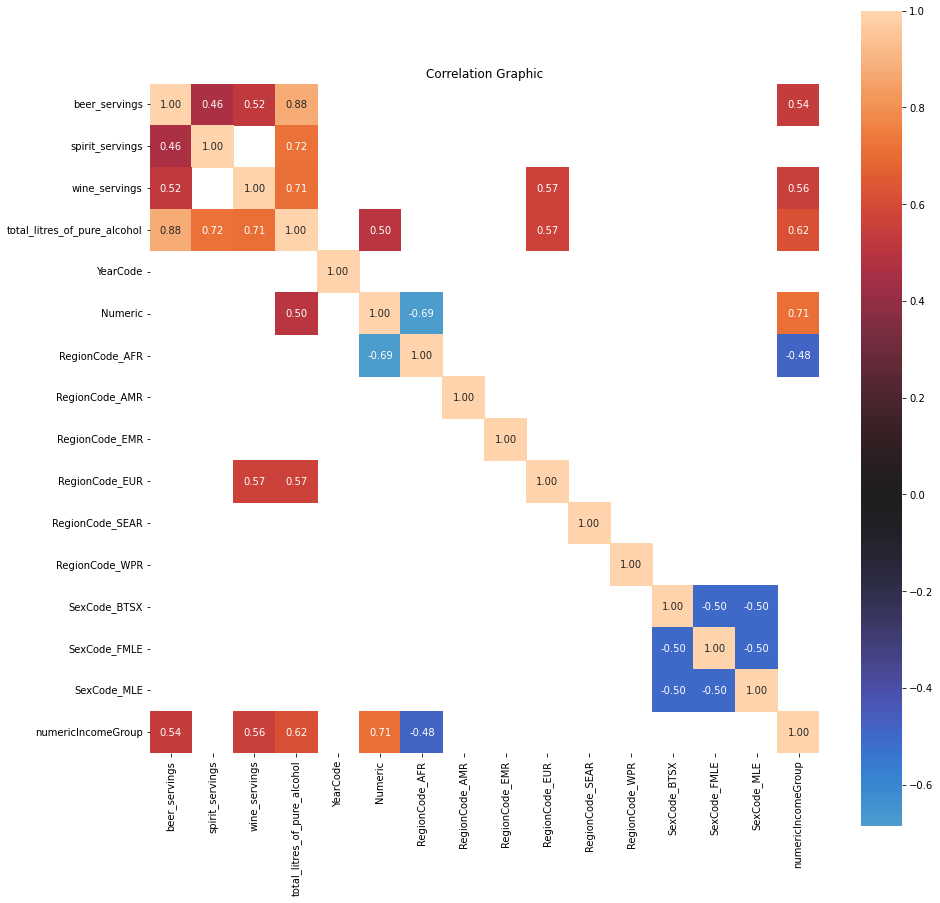

In [98]:
limit= 0.45
matrix=df_merge_oh.corr()
mask=matrix.where((abs(matrix) >= limit)).isna() 
plt.figure(figsize=(15,15))

sns.heatmap(matrix, 
              center=0,
              square=True,
              annot=True, 
              mask=mask,
              fmt='.2f')

plt.title("Correlation Graphic")

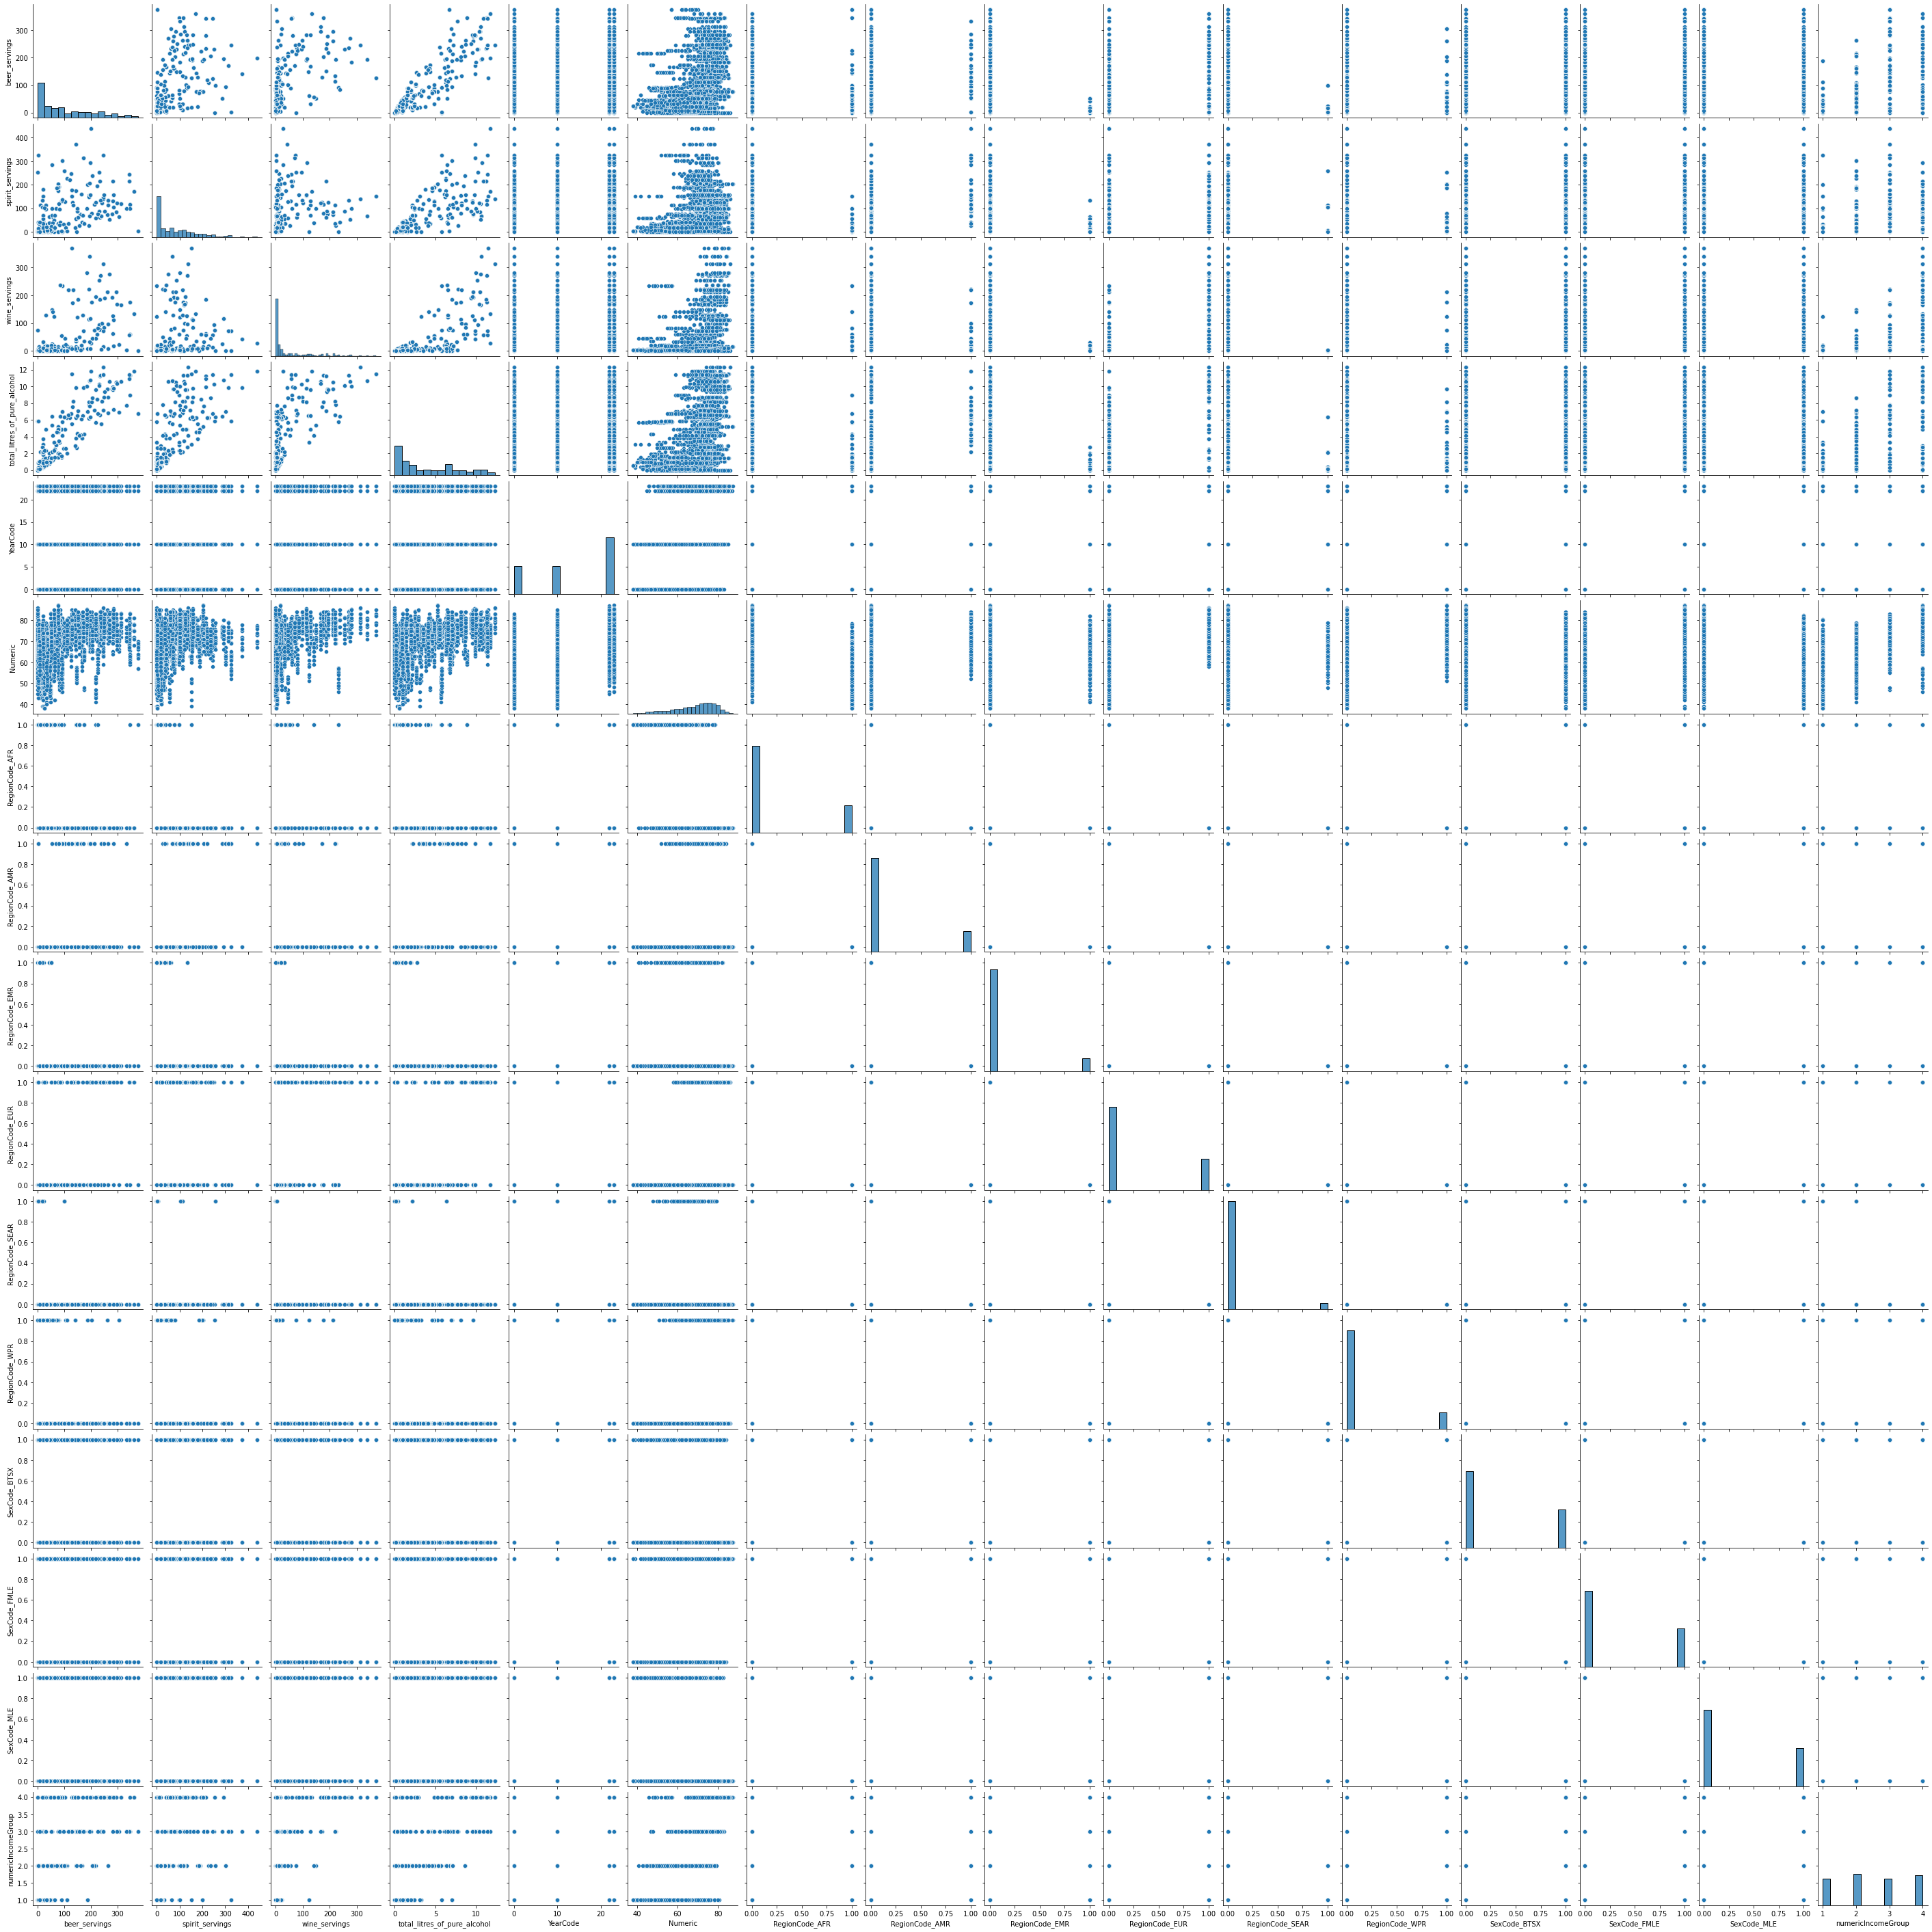

In [76]:
sns.pairplot(df_merge_oh)

In [77]:
df_merge_oh

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearCode,Numeric,BankIncomeGroup,RegionCode_AFR,RegionCode_AMR,RegionCode_EMR,RegionCode_EUR,RegionCode_SEAR,RegionCode_WPR,SexCode_BTSX,SexCode_FMLE,SexCode_MLE,numericIncomeGroup
0,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,61.25205,WB_LI,0,0,1,0,0,0,1,0,0,1
1,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,61.97733,WB_LI,0,0,1,0,0,0,0,1,0,1
2,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,23,60.51228,WB_LI,0,0,1,0,0,0,0,0,1,1
3,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,22,60.00000,WB_LI,0,0,1,0,0,0,1,0,0,1
4,Afghanistan,0.0,0.0,0.0,0.0000,WHOSIS_000001,22,61.00000,WB_LI,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,10,42.00000,WB_LI,1,0,0,0,0,0,0,1,0,1
2324,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,10,42.00000,WB_LI,1,0,0,0,0,0,0,0,1,1
2325,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,0,62.00000,WB_LI,1,0,0,0,0,0,1,0,0,1
2326,Zimbabwe,64.0,18.0,4.0,1.5222,WHOSIS_000001,0,64.00000,WB_LI,1,0,0,0,0,0,0,1,0,1


---
❗
Reviewing only EUR

In [78]:
df_EUR=df_merge_oh[df_merge_oh['RegionCode_EUR']==1]
df_EUR=df_EUR[['total_litres_of_pure_alcohol','GhoCode','Numeric','SexCode_FMLE','SexCode_MLE','numericIncomeGroup']]


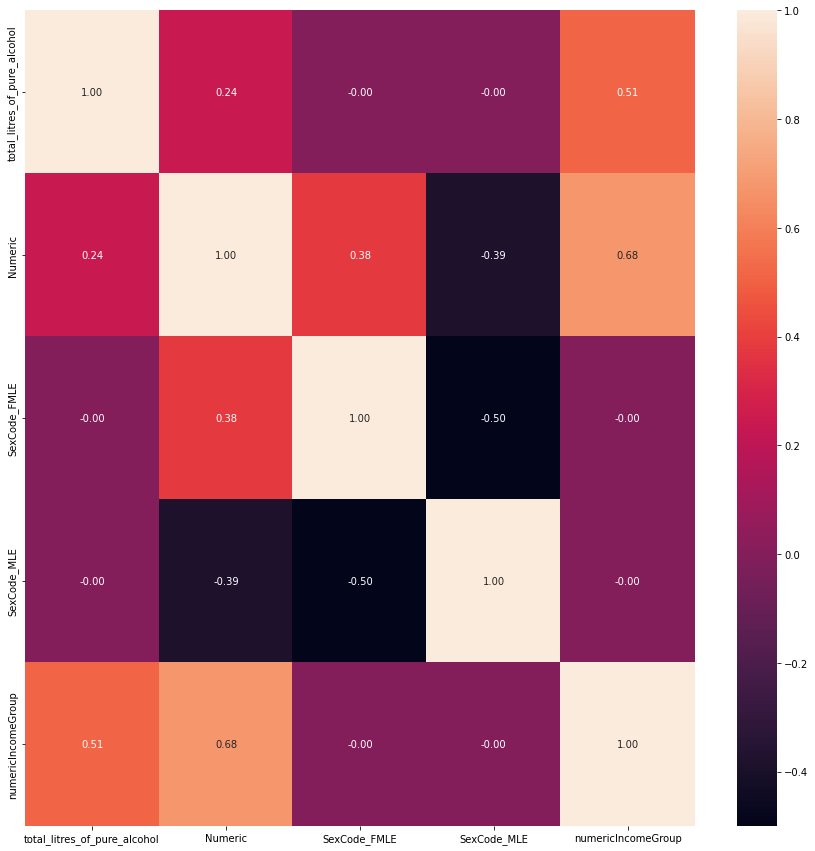

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(df_EUR.corr(), annot=True, fmt='.2f')

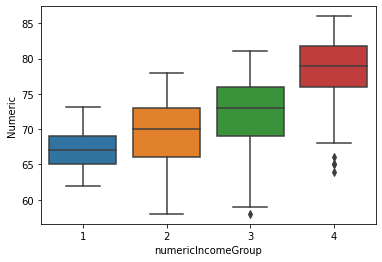

In [80]:
sns.boxplot(data=df_EUR, x='numericIncomeGroup', y='Numeric')

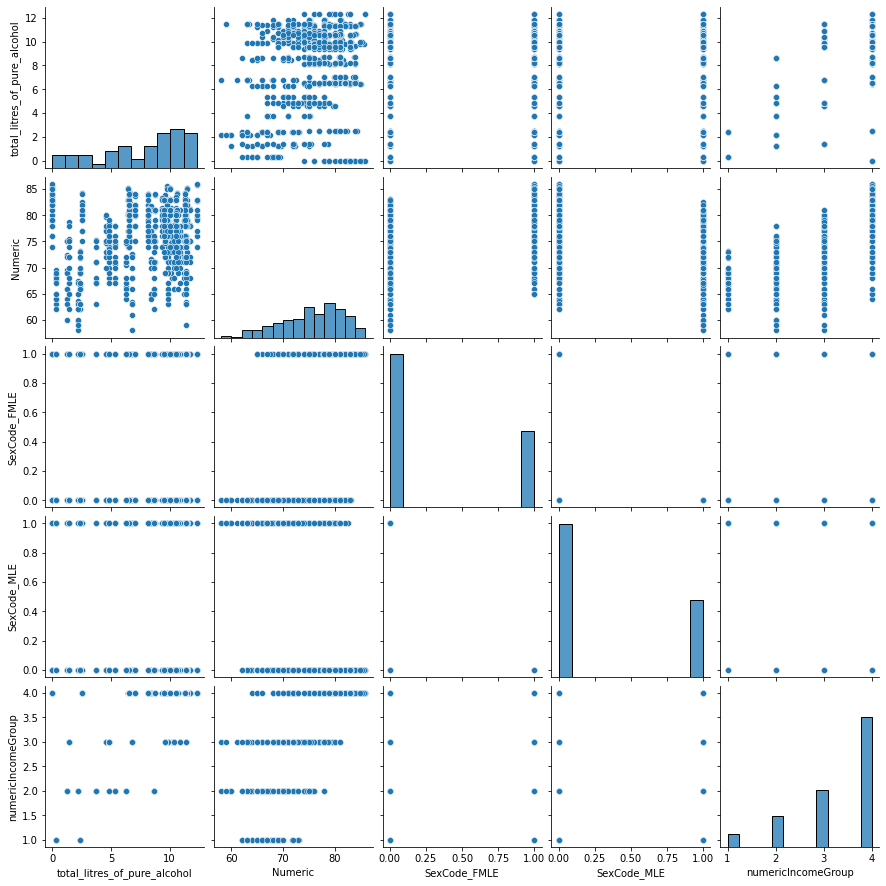

In [81]:
sns.pairplot(df_EUR)